In [1]:
!pip install openpyxl pandas xlrd shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import os
import xlrd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [17]:
def clean_region_name(region):
    cleaned_region = region.split('_(')[0].replace('_', ' ')
    return cleaned_region

# Set the folder containing the Excel files
folder_path = '/kaggle/input/coastalpulse-dataset/'

# List all the files in the folder
files_in_folder = os.listdir(folder_path)

# Filter out the Excel files with a .xlsx extension
excel_files = [file for file in files_in_folder if file.endswith('.xlsx')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Define the date format you expect in the date fields
date_format = '%Y-%m-%d %H:%M:%S'

# Create a date parser based on the date format
date_parser = lambda x: pd.to_datetime(x, format=date_format)

# Loop through the Excel files and read the data
for file in excel_files:
    # Create the full path to the Excel file
    file_path = os.path.join(folder_path, file)

    # Extract the region name from the file name
    region_name = clean_region_name(file[:-5])  # Exclude the '.xlsx' extension from the file name

    # Read the data from the Excel file without parsing any dates
    data = pd.read_excel(file_path, engine='openpyxl')

    # Check if the Greek or English date columns exist, and parse them accordingly
    if 'Από' in data.columns and 'Έως' in data.columns:
        data['Από'] = pd.to_datetime(data['Από'], format=date_format)
        data['Έως'] = pd.to_datetime(data['Έως'], format=date_format)
    elif 'From' in data.columns and 'To' in data.columns:
        data['From'] = pd.to_datetime(data['From'], format=date_format)
        data['To'] = pd.to_datetime(data['To'], format=date_format)

    # Check if the Greek columns exist, and parse them accordingly
    if 'Περιφέρεια' in data.columns:
        data = data.rename(columns={'Περιφέρεια': 'Region',
                                    'Χώρα_προέλευσης': 'Country_of_origin',
                                    'Εισπράξεις': 'Receipts',
                                    'Επισκέψεις': 'Visits',
                                    'Διανυκτερεύσεις': 'Overnight_stays',
                                    'Δαπάνη_ανά_επίσκεψη': 'Spending_per_visit',
                                    'Δαπάνη_ανά_διανυκτέρευση': 'Spending_per_overnight_stay',
                                    'Μέση_διάρκεια_παραμονής': 'Average_length_of_stay'})
    elif 'Region' in data.columns:
        pass  # The column names are already in English
    
    # Add a 'Region' column to the data and fill it with the extracted region name
    data['Region'] = region_name

    # Append the data to the merged_data DataFrame
    merged_data = merged_data.append(data, ignore_index=True)

# Save the merged data as a CSV file
merged_data.to_csv('merged_data.csv', index=False)


/kaggle/input/coastalpulse-dataset/BoG_Travel_by_region_el_2023-03-31.xlsx


In [18]:
file_path = "/kaggle/input/coastalpulse-dataset/BoG_Travel_by_region_el_2023-03-31.xlsx"

# Read the Excel file
df_dataset = pd.read_excel(file_path, engine="openpyxl")

# Display the first few rows of the DataFrame
print(df_dataset.head())

         Από        Έως    Περιφέρεια   Χώρα_προέλευσης Εισπράξεις Επισκέψεις  \
0 2016-01-01 2016-03-31  ΑΤΤΙΚΗ_(EL3)      Σύνολο_χωρών      235.4      636.4   
1 2016-01-01 2016-03-31  ΑΤΤΙΚΗ_(EL3)               ΗΠΑ         33       51.1   
2 2016-01-01 2016-03-31  ΑΤΤΙΚΗ_(EL3)  Ηνωμένο_Βασίλειο       29.9       79.8   
3 2016-01-01 2016-03-31  ΑΤΤΙΚΗ_(EL3)            Κύπρος         18       44.5   
4 2016-01-01 2016-03-31  ΑΤΤΙΚΗ_(EL3)          Γερμανία       15.6       52.4   

  Διανυκτερεύσεις Δαπάνη_ανά_επίσκεψη Δαπάνη_ανά_διανυκτέρευση  \
0          3757.7               369.9                     62.6   
1           504.1               646.8                     65.6   
2           475.5                 374                     62.8   
3           447.8               404.8                     40.2   
4           259.9               297.1                       60   

  Μέση_διάρκεια_παραμονής  
0                     5.9  
1                     9.9  
2                       6  
3   

In [15]:
print(merged_data.head())

        From         To  Balance_of_travel_services  Travel_receipts  \
0 2003-01-01 2003-03-31                       119.4            455.2   
1 2003-04-01 2003-06-30                      1864.6           2405.2   
2 2003-07-01 2003-09-30                      4613.2           5235.4   
3 2003-10-01 2003-12-31                       762.1           1399.5   
4 2004-01-01 2004-03-31                       102.2            522.2   

   Travel_payments                                        Region  \
0            335.8  BoG Balance of Travel Services en 2022-12-30   
1            540.6  BoG Balance of Travel Services en 2022-12-30   
2            622.2  BoG Balance of Travel Services en 2022-12-30   
3            637.4  BoG Balance of Travel Services en 2022-12-30   
4            420.0  BoG Balance of Travel Services en 2022-12-30   

   EU_27_countries  Euro_area_countries Austria Belgium  ... Από  Έως  \
0              NaN                  NaN     NaN     NaN  ... NaT  NaT   
1           

In [71]:
print(merged_data.describe())

       Balance_of_travel_services  Travel_receipts  Travel_payments  \
count                  314.000000       314.000000       314.000000   
mean                  2434.962926      2956.736408       521.769661   
std                   2685.604123      2733.858486       139.374142   
min                   -100.200000       106.221114        85.100000   
25%                    164.600000       617.000000       455.100000   
50%                   1361.046405      1973.200000       536.250000   
75%                   3912.500000      4535.511517       613.400000   
max                  10024.282403     10693.400000       763.300000   

       EU_27_countries  Euro_area_countries       Germany         Italy  \
count      1464.000000          1464.000000   1464.000000   1464.000000   
mean       5485.208109          4331.879460   1842.121193    666.701677   
std       13961.850781         10844.403054   4333.210661   1630.967005   
min           3.700000             5.300000      6.100000   

In [72]:
print(merged_data.isnull().sum())

From                                2462
To                                  2462
Balance_of_travel_services         12988
Travel_receipts                    12988
Travel_payments                    12988
Region                                 0
EU_27_countries                    11838
Euro_area_countries                11838
Austria                            11838
Belgium                            11838
France                             11838
Germany                            11838
Spain                              11838
Italy                              11838
Cyprus                             11838
Netherlands                        11838
EU_countries_excl_euro_area        11838
Denmark                            11838
Romania                            11838
Sweden                             11838
Czech_ Republic                    11838
Other_countries                    11838
Albania                            11838
Australia                          11838
Switzerland     

In [8]:
print(merged_data['Travel_receipts'].value_counts())

2805.600000     8
455.200000      4
1609.100000     4
3587.700000     4
489.400000      4
               ..
486.300000      4
1301.800000     4
4535.511517     3
10576.821644    2
2116.382097     1
Name: Travel_receipts, Length: 79, dtype: int64


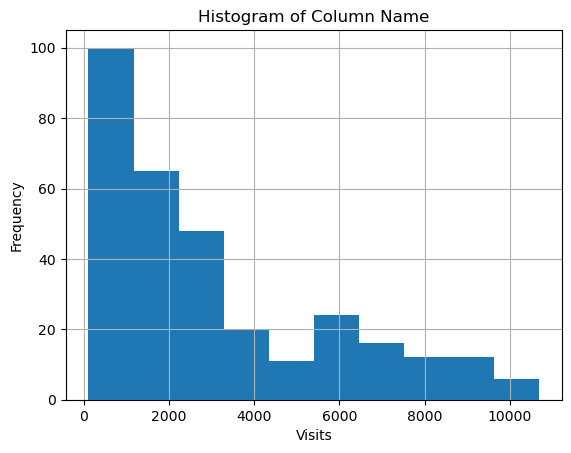

In [9]:
merged_data['Travel_receipts'].hist()
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.title('Histogram of Column Name')
plt.show()

In [9]:
merged_data['Spending_per_visit']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
13297    NaN
13298    NaN
13299    NaN
13300    NaN
13301    NaN
Name: Spending_per_visit, Length: 13302, dtype: object

In [73]:
# data cleaning
# Drop rows with missing values:
cleaned_data = merged_data.dropna()

In [24]:
# cleaned_data = merged_data.dropna(axis=1)
cleaned_data = merged_data.dropna(axis=1)

In [ ]:
# Fill missing values with the mean of the column (applies only to numerical columns):
cleaned_data = merged_data.fillna(merged_data.mean())

In [42]:
print(cleaned_data.columns)

Index(['From', 'To', 'Balance_of_travel_services', 'Travel_receipts',
       'Travel_payments', 'EU_27_countries', 'Euro_area_countries', 'Austria',
       'Belgium', 'France', 'Germany', 'Spain', 'Italy', 'Cyprus',
       'Netherlands', 'EU_countries_excl_euro_area', 'Denmark', 'Romania',
       'Sweden', 'Czech_ Republic', 'Other_countries', 'Albania', 'Australia',
       'Switzerland', 'United_Kingdom', 'USA', 'Canada', 'Russia', 'Cruises',
       'TOTAL', 'Independent_travellers', 'Package_tours', 'Region',
       'Country_of_origin', 'Receipts', 'Visits', 'Overnight_stays',
       'Expenditure_per_visit', 'Expenditure_per_overnigjt_stays',
       'Average_lenght_of_stay', 'Year', 'Από', 'Έως', 'Περιφέρεια',
       'Χώρα_προέλευσης', 'Εισπράξεις', 'Επισκέψεις', 'Διανυκτερεύσεις',
       'Δαπάνη_ανά_επίσκεψη', 'Δαπάνη_ανά_διανυκτέρευση',
       'Μέση_διάρκεια_παραμονής'],
      dtype='object')


In [5]:
cleaned_data.head(10)

NameError: name 'cleaned_data' is not defined

In [52]:
cleaned_data = merged_data.replace("(:)", "")

In [26]:
print(cleaned_data.head(10))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [53]:
merged_data

,From,To,Balance_of_travel_services,Travel_receipts,Travel_payments,EU_27_countries,Euro_area_countries,Austria,Belgium,France,...,Από,Έως,Περιφέρεια,Χώρα_προέλευσης,Εισπράξεις,Επισκέψεις,Διανυκτερεύσεις,Δαπάνη_ανά_επίσκεψη,Δαπάνη_ανά_διανυκτέρευση,Μέση_διάρκεια_παραμονής
0,2003-01-01,2003-03-31,119.4,455.2,335.8,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-04-01,2003-06-30,1864.6,2405.2,540.6,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-07-01,2003-09-30,4613.2,5235.4,622.2,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-10-01,2003-12-31,762.1,1399.5,637.4,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01,2004-03-31,102.2,522.2,420.0,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,2022-01-01,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13298,2022-01-01,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,2022-01-01,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13300,2022-01-01,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Read the Excel file into a DataFrame
file_path = '/kaggle/input/coastalpulse-dataset/25756.xls'
data = pd.read_excel(file_path, engine='xlrd')

# Display the first few rows of the DataFrame
print(data.head())

                                    National results Unnamed: 1 Unnamed: 2  \
0                                  Traveller persons        NaN        NaN   
1                                                NaN        NaN        NaN   
2  Travellers by age, according to destination an...        NaN        NaN   
3                                      Unidades:   %        NaN        NaN   
4                                                NaN        NaN        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1        NaN        NaN        NaN        NaN        NaN         NaN   
2        NaN        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN        NaN         NaN   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0        NaN         N

In [44]:
data

,National results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Traveller persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Travellers by age, according to destination an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unidades: %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Notas:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Trips of resident population aged 15 years and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Fuente:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_ap = {
    'Year': [2021, 2020, 2019, 2018, 2017, 2016, 2015] * 4,
    'Category': ['Total', 'Solo España', 'Solo extranjero', 'España y extranjero'] * 7,
    'Travellers_by_age': [54.12, 46.69, 2.27, 5.17, 63.95, 44.60, 4.12, 15.23, 69.66, 43.61, 5.73, 20.32, 67.37, 43.09, 5.68, 18.61, 65.64, 43.46, 5.38, 16.80, 65.73, 45.13, 5.28, 15.32, 62.80, 43.48, 5.18, 14.14],
    'Percentages over the total number of travellers': [100.00, 86.27, 4.19, 9.55, 100.00, 69.74, 6.44, 23.82, 100.00, 62.61, 8.23, 29.17, 100.00, 63.95, 8.42, 27.62, 100.00, 66.21, 8.19, 25.60, 100.00, 68.67, 8.03, 23.30, 100.00, 69.23, 8.25, 22.52]
}

df = pd.DataFrame(data)
print(df)

           From         To                              Region  \
0    2016-01-01 2016-03-31  BoG Travel by region en 2022-12-30   
1    2016-01-01 2016-03-31  BoG Travel by region en 2022-12-30   
2    2016-01-01 2016-03-31  BoG Travel by region en 2022-12-30   
3    2016-01-01 2016-03-31  BoG Travel by region en 2022-12-30   
4    2016-01-01 2016-03-31  BoG Travel by region en 2022-12-30   
...         ...        ...                                 ...   
2317 2022-01-01 2022-09-30  BoG Travel by region en 2022-12-30   
2318 2022-01-01 2022-09-30  BoG Travel by region en 2022-12-30   
2319 2022-01-01 2022-09-30  BoG Travel by region en 2022-12-30   
2320 2022-01-01 2022-09-30  BoG Travel by region en 2022-12-30   
2321 2022-01-01 2022-09-30  BoG Travel by region en 2022-12-30   

     Country_of_origin      Receipts        Visits Overnight_stays  \
0        All_countries         235.4         636.4          3757.7   
1        United_States            33          51.1           504.1 

In [82]:
# Create the DataFrame for 'data' dictionary
data_df = pd.DataFrame(data)

# Filter the DataFrame to get only the data from Spain
data_spain = data_df[data_df['Category'] == 'Solo España']

# Merge 'cleaned_data' and 'data_spain' DataFrames
merged_data = pd.merge(merged_data, data_spain, on='Year', how='inner')

In [83]:
merged_data

,From,To,Balance_of_travel_services,Travel_receipts,Travel_payments,Region,EU_27_countries,Euro_area_countries,Austria,Belgium,...,Average_lenght_of_stay,Year,Από,Έως,Spending_per_visit,Spending_per_overnight_stay,Average_length_of_stay,Category,Percentage of people in the category,Percentages over the total number of travellers
0,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents average duration of s...,8.672129,10.040049,9.637027,9.526828,...,NaN,2015.0,NaT,NaT,NaN,NaN,NaN,Solo España,43.09,63.95
1,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents expenditure per journ...,587.088421,733.705670,918.602795,773.320651,...,NaN,2015.0,NaT,NaT,NaN,NaN,NaN,Solo España,43.09,63.95
2,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents expenditure per overn...,67.698300,73.077894,95.320141,81.172944,...,NaN,2015.0,NaT,NaT,NaN,NaN,NaN,Solo España,43.09,63.95
3,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents average duration of s...,7.965623,9.474111,9.096358,9.218901,...,NaN,2016.0,NaT,NaT,NaN,NaN,NaN,Solo España,44.60,69.74
4,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents expenditure per journ...,499.451219,624.556535,699.932221,679.905306,...,NaN,2016.0,NaT,NaT,NaN,NaN,NaN,Solo España,44.60,69.74
5,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents expenditure per overn...,62.700840,65.922442,76.946427,73.751231,...,NaN,2016.0,NaT,NaT,NaN,NaN,NaN,Solo España,44.60,69.74
6,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents average duration of s...,7.866953,9.332615,8.856298,8.933134,...,NaN,2017.0,NaT,NaT,NaN,NaN,NaN,Solo España,43.48,69.23
7,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents expenditure per journ...,501.082828,638.324363,648.792041,648.38762,...,NaN,2017.0,NaT,NaT,NaN,NaN,NaN,Solo España,43.48,69.23
8,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents expenditure per overn...,63.694654,68.397163,73.257698,72.582324,...,NaN,2017.0,NaT,NaT,NaN,NaN,NaN,Solo España,43.48,69.23
9,NaT,NaT,NaN,NaN,NaN,BoG Yearly Non residents average duration of s...,7.504992,9.030627,8.73051,9.05037,...,NaN,2018.0,NaT,NaT,NaN,NaN,NaN,Solo España,43.46,66.21


In [84]:
import torch
from torch.utils.data import Dataset

class TourismDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Extract a row from the DataFrame
        row = self.dataframe.iloc[idx]

        # You can select the columns you're interested in
        travel_receipts = row['Travel_receipts']
        travel_payments = row['Travel_payments']
        balance_of_travel_services = row['Balance_of_travel_services']
        percentage_of_people_in_the_category = row['Percentage of people in the category']
        percentages_over_the_total_number_of_travellers = row['Percentages over the total number of travellers']

        # Convert the selected columns to a tensor
        data = torch.tensor([travel_receipts, travel_payments, balance_of_travel_services,
                             percentage_of_people_in_the_category, percentages_over_the_total_number_of_travellers],
                            dtype=torch.float)

        # You can return the data as a dictionary, for example
        sample = {'data': data}

        return sample

# Instantiate the dataset with the merged DataFrame
tourism_dataset = TourismDataset(merged_data)

# Access an example data point
print(tourism_dataset[0])

{'data': tensor([    nan,     nan,     nan, 43.0900, 63.9500])}


In [85]:
len(tourism_dataset)

21

In [24]:
df_dataset

,Από,Έως,Περιφέρεια,Χώρα_προέλευσης,Εισπράξεις,Επισκέψεις,Διανυκτερεύσεις,Δαπάνη_ανά_επίσκεψη,Δαπάνη_ανά_διανυκτέρευση,Μέση_διάρκεια_παραμονής
0,2016-01-01,2016-03-31,ΑΤΤΙΚΗ_(EL3),19,235.4,636.4,3757.7,369.9,62.6,5.9
1,2016-01-01,2016-03-31,ΑΤΤΙΚΗ_(EL3),10,33,51.1,504.1,646.8,65.6,9.9
2,2016-01-01,2016-03-31,ΑΤΤΙΚΗ_(EL3),11,29.9,79.8,475.5,374,62.8,6
3,2016-01-01,2016-03-31,ΑΤΤΙΚΗ_(EL3),13,18,44.5,447.8,404.8,40.2,10.1
4,2016-01-01,2016-03-31,ΑΤΤΙΚΗ_(EL3),8,15.6,52.4,259.9,297.1,60,5
...,...,...,...,...,...,...,...,...,...,...
2403,2022-01-01,2022-12-31,ΠΕΛΟΠΟΝΝΗΣΟΣ_(EL65),8,86.676301,131.897035,1778.088364,657.151246,48.746903,13.480882
2404,2022-01-01,2022-12-31,ΠΕΛΟΠΟΝΝΗΣΟΣ_(EL65),11,40.910868,94.191363,720.264833,434.337781,56.799757,7.646825
2405,2022-01-01,2022-12-31,ΠΕΛΟΠΟΝΝΗΣΟΣ_(EL65),10,38.91927,83.631703,530.832292,465.365036,73.317451,6.347262
2406,2022-01-01,2022-12-31,ΠΕΛΟΠΟΝΝΗΣΟΣ_(EL65),7,51.157023,109.163535,1023.175568,468.627393,49.998284,9.37287


In [38]:
df = df_dataset
df = df.replace('(:)', 0)

In [22]:
# df_dataset
# Your DataFrame should be named df
# Encode categorical columns
le = LabelEncoder()
df['Χώρα_προέλευσης'] = le.fit_transform(df['Χώρα_προέλευσης'])

# Split the data into training and testing sets
X = df[['Χώρα_προέλευσης']]
y = df['Δαπάνη_ανά_διανυκτέρευση']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [23]:
import shap

# Initialize the explainer with the model
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Calculate the ROI for each country
roi_per_country = (df.groupby('Χώρα_προέλευσης')['Δαπάνη_ανά_διανυκτέρευση'].sum() / df.groupby('Χώρα_προέλευσης')['Δαπάνη_ανά_διανυκτέρευση'].count()).reset_index()
roi_per_country.columns = ['Χώρα_προέλευσης', 'ROI']
roi_per_country['Χώρα_προέλευσης'] = le.inverse_transform(roi_per_country['Χώρα_προέλευσης'])

# Find the top 5 countries with the highest ROI
top_5_countries = roi_per_country.sort_values('ROI', ascending=False).head(5)

print("Top 5 countries with the highest ROI:")
print(top_5_countries)

Top 5 countries with the highest ROI:
    Χώρα_προέλευσης        ROI
1                 1  79.211436
9                 9  72.718837
20               20  68.130353
0                 0  67.101038
4                 4  61.207095


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Convert 'Μέση_διάρκεια_παραμονής' column to a numeric data type
df['Μέση_διάρκεια_παραμονής'] = pd.to_numeric(df['Μέση_διάρκεια_παραμονής'], errors='coerce')

# Encode categorical columns
le = LabelEncoder()
df['Χώρα_προέλευσης'] = le.fit_transform(df['Χώρα_προέλευσης'])
df['Περιφέρεια'] = le.fit_transform(df['Περιφέρεια'])

# Split the data into training and testing sets
X = df[['Χώρα_προέλευσης', 'Περιφέρεια', 'Μέση_διάρκεια_παραμονής', 'Επισκέψεις', 'Διανυκτερεύσεις']]
y = df['Δαπάνη_ανά_διανυκτέρευση']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
# Encode categorical columns with separate LabelEncoders
le_country = LabelEncoder()
le_region = LabelEncoder()

df['Χώρα_προέλευσης'] = le_country.fit_transform(df['Χώρα_προέλευσης'])
df['Περιφέρεια'] = le_region.fit_transform(df['Περιφέρεια'])

# Predict Δαπάνη_ανά_διανυκτέρευση for the entire dataset
df['predicted_Δαπάνη_ανά_διανυκτέρευση'] = model.predict(X)

# Calculate the ROI for each country
roi_per_country = (df.groupby('Χώρα_προέλευσης')['predicted_Δαπάνη_ανά_διανυκτέρευση'].sum() / df.groupby('Χώρα_προέλευσης')['predicted_Δαπάνη_ανά_διανυκτέρευση'].count()).reset_index()
roi_per_country.columns = ['Χώρα_προέλευσης', 'ROI']

# Convert the encoded countries back to their original names
roi_per_country['Χώρα_προέλευσης'] = le_country.inverse_transform(roi_per_country['Χώρα_προέλευσης'])

# Find the top 5 countries with the highest ROI
top_5_countries = roi_per_country.sort_values('ROI', ascending=False).head(5)

print("Top 5 countries with the highest ROI:")
print(top_5_countries)

Top 5 countries with the highest ROI:
    Χώρα_προέλευσης        ROI
1                 1  80.393363
9                 9  70.310128
20               20  68.135789
0                 0  67.453840
19               19  60.831527


In [47]:
data_ap = {
    'Year': [2021, 2020, 2019, 2018, 2017, 2016, 2015] * 4,
    'Category': ['Total', 'Solo España', 'Solo extranjero', 'España y extranjero'] * 7,
    'Travellers_by_age': [54.12, 46.69, 2.27, 5.17, 63.95, 44.60, 4.12, 15.23, 69.66, 43.61, 5.73, 20.32, 67.37, 43.09, 5.68, 18.61, 65.64, 43.46, 5.38, 16.80, 65.73, 45.13, 5.28, 15.32, 62.80, 43.48, 5.18, 14.14],
    'Percentages over the total number of travellers': [100.00, 86.27, 4.19, 9.55, 100.00, 69.74, 6.44, 23.82, 100.00, 62.61, 8.23, 29.17, 100.00, 63.95, 8.42, 27.62, 100.00, 66.21, 8.19, 25.60, 100.00, 68.67, 8.03, 23.30, 100.00, 69.23, 8.25, 22.52]
}

data_ap_df = pd.DataFrame(data_ap)
data_ap_df['Χώρα_προέλευσης'] = 'Spain'
data_ap_df.rename(columns={'Travellers_by_age': 'Δαπάνη_ανά_διανυκτέρευση'}, inplace=True)
merged_df = pd.concat([df, data_ap_df], ignore_index=True, sort=False)
columns_to_nullify = ['Από', 'Έως', 'Περιφέρεια', 'Εισπράξεις', 'Επισκέψεις', 'Διανυκτερεύσεις', 'Δαπάνη_ανά_επίσκεψη', 'Μέση_διάρκεια_παραμονής']

for column in columns_to_nullify:
    merged_df.loc[merged_df['Χώρα_προέλευσης'] != 'Spain', column] = None

print(merged_df)


     Από Έως Περιφέρεια Χώρα_προέλευσης  Εισπράξεις  Επισκέψεις  \
0    NaT NaT       None              19         NaN         NaN   
1    NaT NaT       None              10         NaN         NaN   
2    NaT NaT       None              11         NaN         NaN   
3    NaT NaT       None              13         NaN         NaN   
4    NaT NaT       None               8         NaN         NaN   
...   ..  ..        ...             ...         ...         ...   
2431 NaT NaT        NaN           Spain         NaN         NaN   
2432 NaT NaT        NaN           Spain         NaN         NaN   
2433 NaT NaT        NaN           Spain         NaN         NaN   
2434 NaT NaT        NaN           Spain         NaN         NaN   
2435 NaT NaT        NaN           Spain         NaN         NaN   

      Διανυκτερεύσεις  Δαπάνη_ανά_επίσκεψη  Δαπάνη_ανά_διανυκτέρευση  \
0                 NaN                  NaN                     62.60   
1                 NaN                  NaN         

In [ ]:
df = df_dataset
df = df.replace('(:)', 0)

In [42]:
# simulation of predictive data with synthetic data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [49]:
# Convert the 'Χώρα_προέλευσης' column to a string data type
merged_df['Χώρα_προέλευσης'] = merged_df['Χώρα_προέλευσης'].astype(str)

# Encode Χώρα_προέλευσης using LabelEncoder
le = LabelEncoder()
merged_df['Χώρα_προέλευσης'] = le.fit_transform(merged_df['Χώρα_προέλευσης'])

# Use only the Χώρα_προέλευσης column
data = merged_df['Χώρα_προέλευσης'].values

# Normalize data to [0, 1] range
data = data / data.max()

# Create a DataLoader
dataset = TensorDataset(torch.Tensor(data))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [50]:
def train_gan(dataloader, generator, discriminator, epochs=2, latent_dim=100):
    gen_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
    dis_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        for batch in dataloader:
            real_data = batch[0].view(-1, 1)
            batch_size = real_data.size(0)

            # Train discriminator
            dis_optimizer.zero_grad()

            noise = torch.randn(batch_size, latent_dim)
            fake_data = generator(noise)

            real_scores = discriminator(real_data)
            fake_scores = discriminator(fake_data)

            real_loss = criterion(real_scores, torch.ones_like(real_scores))
            fake_loss = criterion(fake_scores, torch.zeros_like(fake_scores))

            dis_loss = real_loss + fake_loss
            dis_loss.backward()
            dis_optimizer.step()

            # Train generator
            gen_optimizer.zero_grad()

            noise = torch.randn(batch_size, latent_dim)
            fake_data = generator(noise)
            fake_scores = discriminator(fake_data)

            gen_loss = criterion(fake_scores, torch.ones_like(fake_scores))
            gen_loss.backward()
            gen_optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}]')

In [52]:
# Create instances of the generator and discriminator
latent_dim = 100
generator = Generator(input_dim=latent_dim, output_dim=1)
discriminator = Discriminator(input_dim=1)

# Train the GAN using the train_gan function
train_gan(dataloader, generator, discriminator, epochs=2, latent_dim=latent_dim)

Epoch [1/2]
Epoch [2/2]


In [53]:
# Generate synthetic data
with torch.no_grad():
    noise = torch.randn(1, 100)  # Replace 1 with the number of samples you want to generate
    synthetic_data = generator(noise)

print(synthetic_data)

tensor([[0.4635]])


In [54]:
# Save the trained generator model
torch.save(generator.state_dict(), 'generator_model.pt')

# Load the generator model
loaded_generator = Generator(input_dim=latent_dim, output_dim=1)
loaded_generator.load_state_dict(torch.load('generator_model.pt'))
loaded_generator.eval()

# Generate synthetic data using the trained generator
def generate_synthetic_data(generator, num_samples, latent_dim):
    noise = torch.randn(num_samples, latent_dim)
    synthetic_data = generator(noise).detach().numpy()
    return synthetic_data

num_samples = 10
synthetic_data = generate_synthetic_data(loaded_generator, num_samples, latent_dim)
print("Synthetic data:")
print(synthetic_data)

Synthetic data:
[[0.35919797]
 [0.37082583]
 [0.43005165]
 [0.4649125 ]
 [0.45529687]
 [0.43460461]
 [0.43604937]
 [0.44424593]
 [0.3903681 ]
 [0.33715442]]
